In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from function import *
from config import *
from factor_backtest import factor_backtest
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000) 

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore') 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

           交易日期  股票名称              下日_开盘买入涨跌幅                                           下周期每天涨跌幅
221  2007-02-28  上海家化  [-0.05159999999999998]  [-0.05159999999999998, 0.008013496415014698, -...
575  2007-02-28  山西汾酒   [0.04527255928549434]  [0.04527255928549434, 0.0023571007660578847, -...
1128 2007-02-28  鲁阳股份   [-0.0618343195266271]  [-0.0618343195266271, 0.026490066225165476, -0...
1268 2007-03-30  天坛生物  [0.037944664031620556]  [0.037944664031620556, 0.03160700685453155, 0....
1285 2007-03-30   新华光  [-0.02451518477863146]  [-0.02451518477863146, -0.024756189047261845, ...
2288 2007-03-30  江苏国泰  [0.011363636363636243]  [0.011363636363636243, -0.005617977528090012, ...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅       资金曲线
135 2018-05-31  sh600350 sz000662 sz002251    山东高速 天夏智慧 步步高  -0.102162  [0.02502207889359087, -0.0031073561518104587, ...  47.859238
136 2018-06-29  sh600066 sh603077 sz000591    宇通客车 和邦生物

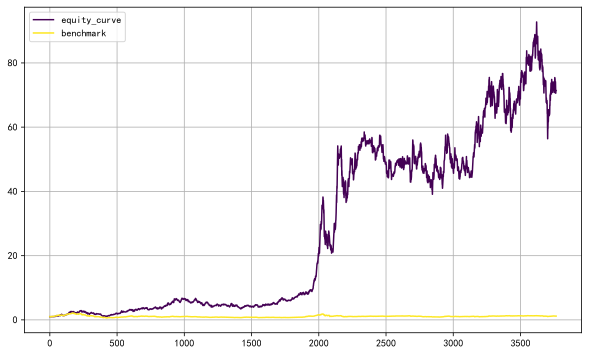

In [2]:
period_df, equity, select_stock = factor_backtest('量价相关系数', True)

In [6]:
period_df.head()

,选中股票代码,选股涨跌幅,指数涨跌幅,超额收益
周期开始时间,,,,
2007-02-01,empty,0.000000,0.034002,-0.034002
2007-03-01,sh600271 sh600276 sh600858,-0.075630,0.105138,-0.180768
2007-04-02,sz000527 sz002028 sz002029,0.222778,0.206437,0.016341
2007-05-08,sh600038 sz000527 sz002029,0.123203,0.069868,0.053335
2007-06-01,sh600150 sh600859 sz000024,0.078714,-0.070310,0.149024


In [7]:
equity.head()

,交易日期,指数涨跌幅,持有股票代码,涨跌幅,equity_curve,benchmark,周期开始时间
0,2007-02-01,-0.000323,empty,0.0,1.0,0.999677,2007-02-01
1,2007-02-02,-0.040288,empty,0.0,1.0,0.959402,2007-02-01
2,2007-02-05,-0.022696,empty,0.0,1.0,0.937628,2007-02-01
3,2007-02-06,0.024176,empty,0.0,1.0,0.960295,2007-02-01
4,2007-02-07,0.015129,empty,0.0,1.0,0.974824,2007-02-01


In [8]:
select_stock.head()

,交易日期,股票数量,买入股票代码,买入股票名称,选股下周期涨跌幅,选股下周期每天涨跌幅
0,2007-01-31,0,empty,empty,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2007-02-28,0,sh600271 sh600276 sh600858,航天信息 恒瑞医药 银座股份,-0.075630,"[-0.05971197673770412, 0.008199088448377134, -..."
2,2007-03-30,0,sz000527 sz002028 sz002029,美的电器 思源电气 七匹狼,0.222778,"[0.019245906393434042, -0.007674886550238846, ..."
3,2007-04-30,0,sh600038 sz000527 sz002029,哈飞股份 美的电器 七匹狼,0.123203,"[0.014660579474482738, -0.007635083838051782, ..."
4,2007-05-31,0,sh600150 sh600859 sz000024,沪东重机 王府井 招商地产,0.078714,"[-0.033356519696603026, -0.0999266340277083, 0..."


           交易日期  股票名称              下日_开盘买入涨跌幅                                           下周期每天涨跌幅
25   2007-02-28  歌华有线  [-0.08672499049068083]  [-0.08672499049068083, 0.04914618908787993, -0...
221  2007-02-28  上海家化  [-0.05159999999999998]  [-0.05159999999999998, 0.008013496415014698, -...
876  2007-02-28  宝新能源  [0.053608247422680444]  [0.053608247422680444, 0.09980430528375739, 0....
1256 2007-03-30  金发科技  [-0.02786377708978327]  [-0.02786377708978327, 0.0019108280254778176, ...
1331 2007-03-30  万通先锋  [0.013023255813953583]  [0.013023255813953583, -0.012855831037649312, ...
1922 2007-03-30  华天酒店  [0.011949685534591081]  [0.011949685534591081, 0.003107520198881275, -...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh600666 sz300259 sz300547    奥瑞德 新天科技 川环科技  -0.110824  [-0.017445140114454416, -0.032261840474560155,...  0.197504
136 2018-06-29  sz002398 sz002451 sz300668   建研集团 摩恩电气 杰恩

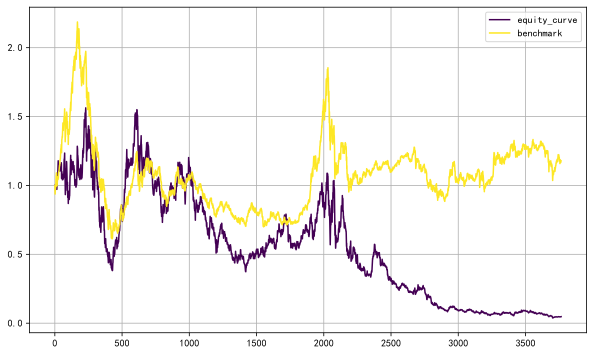

In [3]:
# 动量因子
period_df, equity, select_stock = factor_backtest('本周期涨跌幅', True)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
387  2007-02-28  方兴科技     [0.1408629441624365]  [0.1408629441624365, 0.0, 0.015572858731924377...
606  2007-02-28  中西药业     [-0.088016967126193]  [-0.088016967126193, 0.02209302325581386, -0.0...
1025 2007-02-28  金马股份  [-0.015189873417721489]  [-0.015189873417721489, -0.02570694087403602, ...
1823 2007-03-30  江苏开元    [0.04336283185840695]  [0.04336283185840695, -0.003392705682781938, -...
1826 2007-03-30  建设机械    [0.05816326530612237]  [0.05816326530612237, 0.10028929604628756, 0.0...
2092 2007-03-30  北京旅游   [0.010322580645161228]  [0.010322580645161228, 0.015325670498084198, 0...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh603348 sh603596 sz300743    文灿股份 伯特利 天地数码  -0.256160  [-0.035410837003290285, -0.053627846815725855,...  0.036157
136 2018-06-29  sh603045 sz002725 sz300746   福达合金 

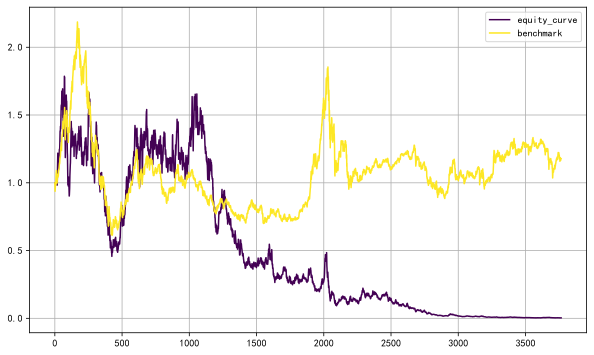

In [4]:
# 反转因子
period_df, equity, select_stock = factor_backtest('本周期涨跌幅', False)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
188  2007-02-28  航天信息   [-0.03681506849315064]  [-0.03681506849315064, 0.0031111111111110645, ...
190  2007-02-28  恒瑞医药  [-0.059237219367054283]  [-0.059237219367054283, -0.004025301897642386,...
618  2007-02-28  银座股份    [-0.0827450980392157]  [-0.0827450980392157, 0.02607952116289014, -0....
1943 2007-03-30  美的电器    [0.02227090178897395]  [0.02227090178897395, -0.003214285714285725, 0...
2226 2007-03-30  思源电气  [-0.004566210045662156]  [-0.004566210045662156, -0.009829619921363109,...
2227 2007-03-30   七匹狼    [0.04039999999999999]  [0.04039999999999999, -0.009996155324875078, 0...
          交易日期                       买入股票代码            买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh601628 sh601857 sh601988    中国人寿 中国石油 中国银行  -0.044515  [0.001433361467914951, 0.0069434085188635475, ...  1.473792
136 2018-06-29  sh601633 sh601857 sh601988    长城

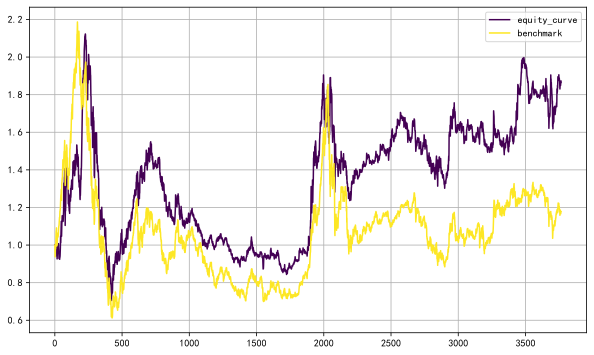

In [5]:
# 低换手率策略
period_df, equity, select_stock = factor_backtest('换手率', True)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
400  2007-02-28  潜江制药  [-0.051724137931034475]  [-0.051724137931034475, -0.024793388429751984,...
438  2007-02-28  永生数据   [-0.07724550898203586]  [-0.07724550898203586, 0.005191434133679396, -...
865  2007-02-28  阳光发展  [-0.041860465116279055]  [-0.041860465116279055, 0.021844660194174637, ...
1435 2007-03-30  贤成实业   [0.028571428571428692]  [0.028571428571428692, 0.0030864197530864335, ...
1798 2007-03-30  力诺太阳   [0.010101010101010166]  [0.010101010101010166, 0.0024999999999999467, ...
1839 2007-03-30  重庆钢铁   [0.020061728395061706]  [0.020061728395061706, -0.00907715582450841, 0...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh603733 sz002931 sz300634   仙鹤股份 锋龙股份 彩讯股份  -0.126799  [-0.024823516482302077, 0.009494920672310725, ...  0.052507
136 2018-06-29  sh603045 sz002903 sz002930   福达合金 

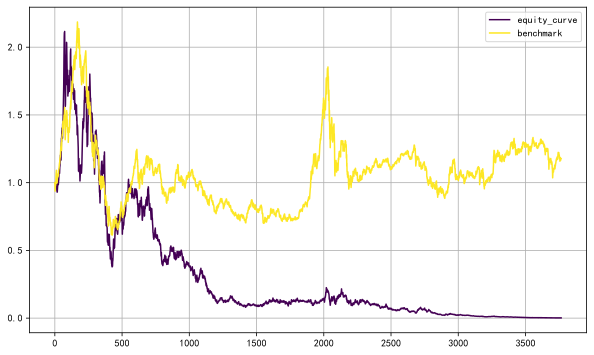

In [10]:
# 高换手率策略
period_df, equity, select_stock = factor_backtest('换手率', False)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
1141 2007-02-28  广东鸿图   [-0.04258760107816706]  [-0.04258760107816706, 0.009009009009008917, 0...
1144 2007-02-28  恒宝股份   [0.019765739385065872]  [0.019765739385065872, 0.002871500358937684, 0...
1148 2007-02-28  沧州明珠  [-0.019551466359976954]  [-0.019551466359976954, 0.009970674486803333, ...
1408 2007-03-30  国阳新能   [0.030286343612334843]  [0.030286343612334843, 0.031533939070016004, -...
2303 2007-03-30  莱宝高科    [0.02297297297297307]  [0.02297297297297307, -0.005548216644649995, 0...
2312 2007-03-30  三维通信   [0.009989484752891853]  [0.009989484752891853, -0.0036439354502862953,...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh600575 sh603167 sz002609   皖江物流 渤海轮渡 捷顺科技  -0.119809  [0.010089890944405822, 0.009749386958967765, -...  0.957485
136 2018-06-29  sh601229 sz000990 sz002578   上海银行 

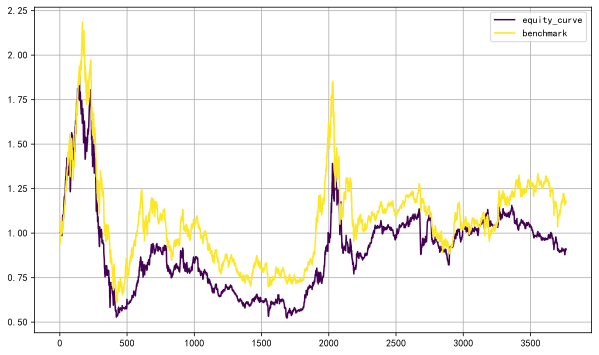

In [11]:
# 低振幅1
period_df, equity, select_stock = factor_backtest('振幅1', True)

           交易日期  股票名称              下日_开盘买入涨跌幅                                           下周期每天涨跌幅
48   2007-02-28  江南重工  [-0.08431372549019611]  [-0.08431372549019611, -0.0999286224125625, -0...
606  2007-02-28  中西药业    [-0.088016967126193]  [-0.088016967126193, 0.02209302325581386, -0.0...
821  2007-02-28  舒卡股份   [0.05219454329774598]  [0.05219454329774598, 0.0, -0.0868094701240135...
1256 2007-03-30  金发科技  [-0.02786377708978327]  [-0.02786377708978327, 0.0019108280254778176, ...
1331 2007-03-30  万通先锋  [0.013023255813953583]  [0.013023255813953583, -0.012855831037649312, ...
1922 2007-03-30  华天酒店  [0.011949685534591081]  [0.011949685534591081, 0.003107520198881275, -...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh600666 sz300259 sz300743    奥瑞德 新天科技 天地数码  -0.180644  [-0.02281897884876971, -0.05956826582703867, 0...  0.020774
136 2018-06-29  sz002451 sz300668 sz300718   摩恩电气 杰恩设计 长盛

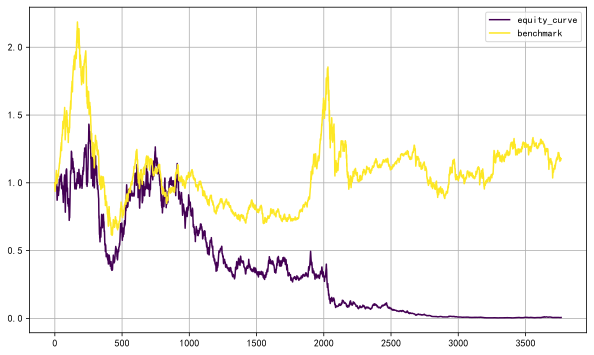

In [12]:
# 高振幅1
period_df, equity, select_stock = factor_backtest('振幅1', False)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
1126 2007-02-28  东方海洋  [-0.023700305810397615]  [-0.023700305810397615, 0.04228660924040728, -...
1144 2007-02-28  恒宝股份   [0.019765739385065872]  [0.019765739385065872, 0.002871500358937684, 0...
1148 2007-02-28  沧州明珠  [-0.019551466359976954]  [-0.019551466359976954, 0.009970674486803333, ...
2303 2007-03-30  莱宝高科    [0.02297297297297307]  [0.02297297297297307, -0.005548216644649995, 0...
2305 2007-03-30  沧州明珠    [0.01967213114754096]  [0.01967213114754096, 0.002679528403001008, 0....
2312 2007-03-30  三维通信   [0.009989484752891853]  [0.009989484752891853, -0.0036439354502862953,...
          交易日期                       买入股票代码            买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh600269 sh600575 sh601166    赣粤高速 皖江物流 兴业银行  -0.048719  [0.0006833455113874898, 0.0022515794775541664,...  0.565222
136 2018-06-29  sh600377 sh601328 sh601988    宁沪

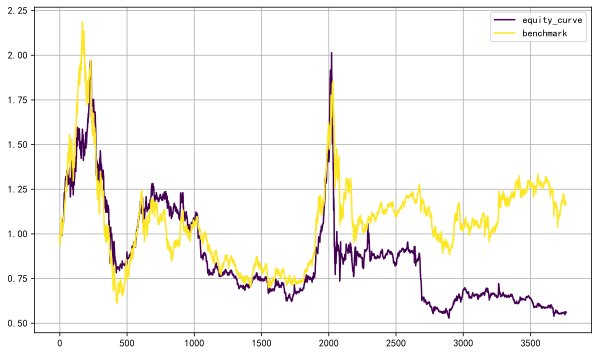

In [13]:
# 高振幅2
period_df, equity, select_stock = factor_backtest('振幅2', True)

           交易日期  股票名称              下日_开盘买入涨跌幅                                           下周期每天涨跌幅
459  2007-02-28  中卫国脉  [-0.08713450292397673]  [-0.08713450292397673, 0.014734144778987934, -...
557  2007-02-28  鲁银投资  [-0.06946264744429886]  [-0.06946264744429886, 0.030985915492957927, -...
940  2007-02-28  天山纺织  [-0.05095541401273895]  [-0.05095541401273895, 0.01118568232662187, 0....
1315 2007-03-30  万杰高科  [0.024299065420560817]  [0.024299065420560817, 0.007299270072992581, -...
2049 2007-03-30  锦龙股份   [0.08692247454972613]  [0.08692247454972613, -0.026657060518732068, 0...
2082 2007-03-30  西南合成  [0.023391812865497075]  [0.023391812865497075, -0.017142857142857237, ...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅      资金曲线
135 2018-05-31  sh600929 sz002931 sz300589   湖南盐业 锋龙股份 江龙船艇  -0.159859  [-0.02950082157945544, -0.02377603087489033, 0...  0.011104
136 2018-06-29  sz002684 sz002885 sz002903    猛狮科技 京泉华 宇环

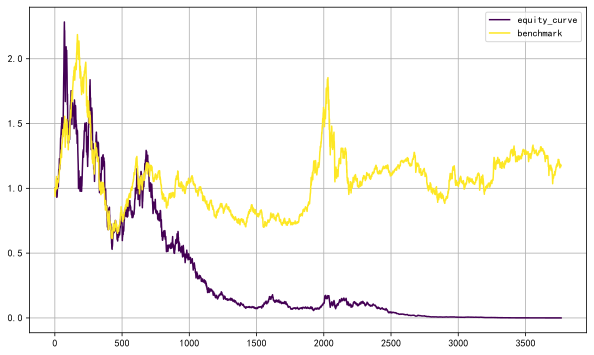

In [14]:
# 低振幅2
period_df, equity, select_stock = factor_backtest('振幅2', False)

           交易日期  股票名称               下日_开盘买入涨跌幅                                           下周期每天涨跌幅
505  2007-02-28  长安信息   [-0.03411131059245964]  [-0.03411131059245964, 0.1003717472118959, -0....
695  2007-02-28   宝利来  [-0.039246467817896424]  [-0.039246467817896424, 0.019607843137254832, ...
1056 2007-02-28  威尔科技  [-0.031161473087818692]  [-0.031161473087818692, 0.02046783625731008, 0...
1666 2007-03-30  长安信息    [0.02170767004341534]  [0.02170767004341534, 0.10056657223796028, 0.0...
2023 2007-03-30  领先科技    [0.01773399014778332]  [0.01773399014778332, 0.07550822846079375, 0.0...
2215 2007-03-30  威尔科技     [0.0185185185185186]  [0.0185185185185186, 0.00848484848484854, -0.0...
          交易日期                       买入股票代码            买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅        资金曲线
135 2018-05-31  sz300028 sz300029 sz300106    金亚科技 天龙光电 西部牧业  -0.235474  [0.0024689504615935665, -0.013086920675131397,...  207.508386
136 2018-06-29  sz300028 sz300029 sz300106  

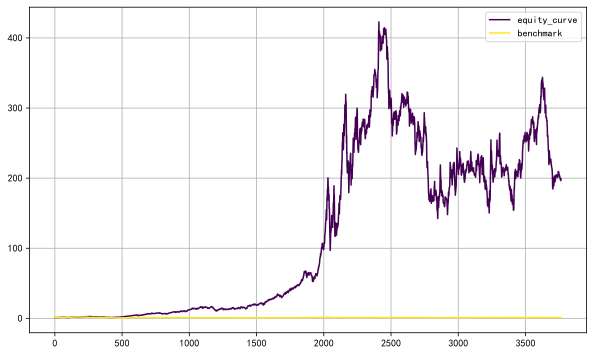

In [15]:
period_df, equity, select_stock = factor_backtest('总市值', True)

           交易日期  股票名称                下日_开盘买入涨跌幅                                           下周期每天涨跌幅
438  2007-02-28  永生数据    [-0.07724550898203586]  [-0.07724550898203586, 0.005191434133679396, -...
452  2007-02-28  白猫股份     [0.09850746268656696]  [0.09850746268656696, -0.0009057971014492239, ...
1098 2007-02-28   威尔泰  [-0.0026954177897574594]  [-0.0026954177897574594, 0.01441441441441449, ...
1601 2007-03-30  联华合纤    [0.023311416616855984]  [0.023311416616855984, -0.013434579439252414, ...
2255 2007-03-30   威尔泰    [0.022222222222222365]  [0.022222222222222365, -0.0023291925465839247,...
2263 2007-03-30  瑞泰科技    [0.014009339559706513]  [0.014009339559706513, 0.007894736842105399, -...
          交易日期                       买入股票代码           买入股票名称  选股下周期涨跌幅                                         选股下周期每天涨跌幅       资金曲线
135 2018-05-31  sh603860 sz300665 sz300669   中公高科 飞鹿股份 沪宁股份  -0.119814  [0.0038941245188830464, 0.037521918422443346, ...  28.250247
136 2018-06-29  sh603617 sh603860 sz00289

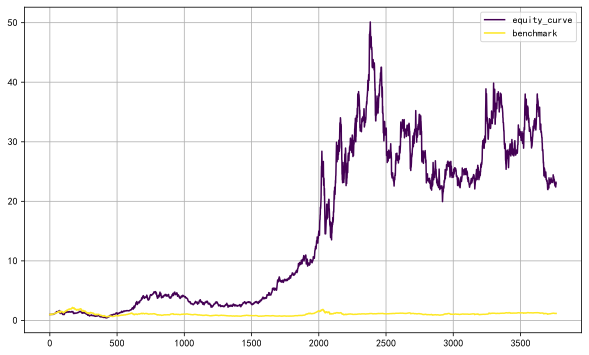

In [16]:
period_df, equity, select_stock = factor_backtest('流通市值', True)